In [ ]:
from datetime import datetime

protection = datetime(2023, 6, 9)
today = datetime.now()

print(f'До защиты {protection - today}')

До защиты 11 days, 12:51:15.943826


**ГРАФИК РАССЕИВАНИЯ**

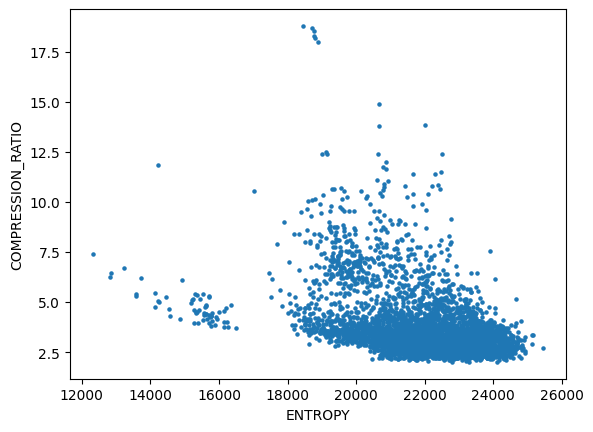

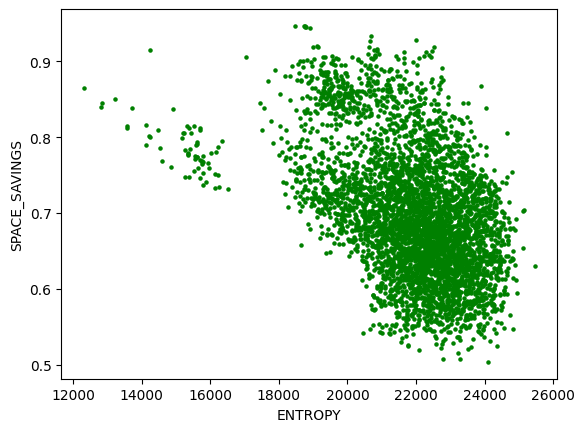

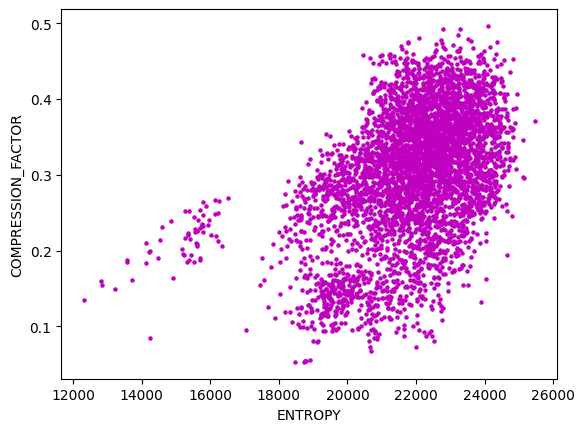

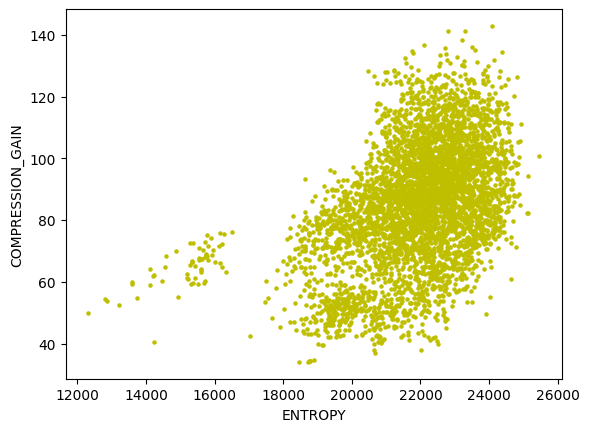

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/stat.csv')

df.plot.scatter(x='ENTROPY', y='COMPRESSION_RATIO', s=5);
df.plot.scatter(x='ENTROPY', y='SPACE_SAVINGS', s=5, c='g');
df.plot.scatter(x='ENTROPY', y='COMPRESSION_FACTOR', s=5, c='m');
df.plot.scatter(x='ENTROPY', y='COMPRESSION_GAIN', s=5, c='y');

**ДИАГРАММА РАССЕИВАНИЯ + TRENDLINE**

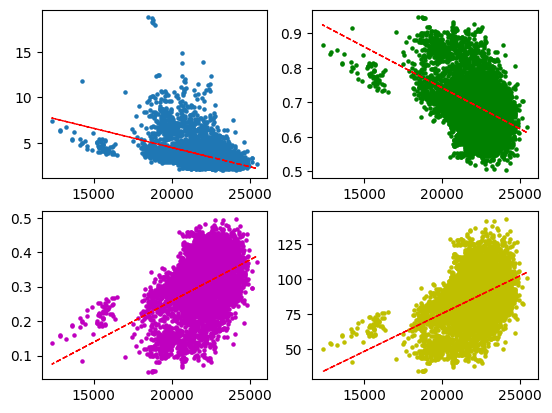

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv = pd.read_csv('https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/stat.csv')
data = csv[['ENTROPY', 'COMPRESSION_RATIO', 'SPACE_SAVINGS', 'COMPRESSION_FACTOR', 'COMPRESSION_GAIN']]

x = data['ENTROPY']
y1 = data['COMPRESSION_RATIO']
y2 = data['SPACE_SAVINGS']
y3 = data['COMPRESSION_FACTOR']
y4 = data['COMPRESSION_GAIN']


z1 = np.polyfit(x, y1, 1)
p1 = np.poly1d(z1)

z2 = np.polyfit(x, y2, 1)
p2 = np.poly1d(z2)

z3 = np.polyfit(x, y3, 1)
p3 = np.poly1d(z3)

z4 = np.polyfit(x, y4, 1)
p4 = np.poly1d(z4)


fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0, 0].scatter(x, y1, s=5)
axs[0, 0].plot(x, p1(x), "r--", linewidth=1)

axs[0, 1].scatter(x, y2, s=5, c='g')
axs[0, 1].plot(x, p2(x), "r--", linewidth=1)

axs[1, 0].scatter(x, y3, s=5, c='m')
axs[1, 0].plot(x, p3(x), "r--", linewidth=1)

axs[1, 1].scatter(x, y4, s=5, c='y')
axs[1, 1].plot(x, p4(x), "r--", linewidth=1)

**ВРЕМЕННЫЕ ГИСТОГРАММЫ**

array([<Axes: title={'center': 'COMPRESSION_TIME'}, xlabel='ID'>,
       <Axes: title={'center': 'ACCUMULATIVE_TIME'}, xlabel='ID'>,
       <Axes: title={'center': 'ENTROPY'}, xlabel='ID'>], dtype=object)

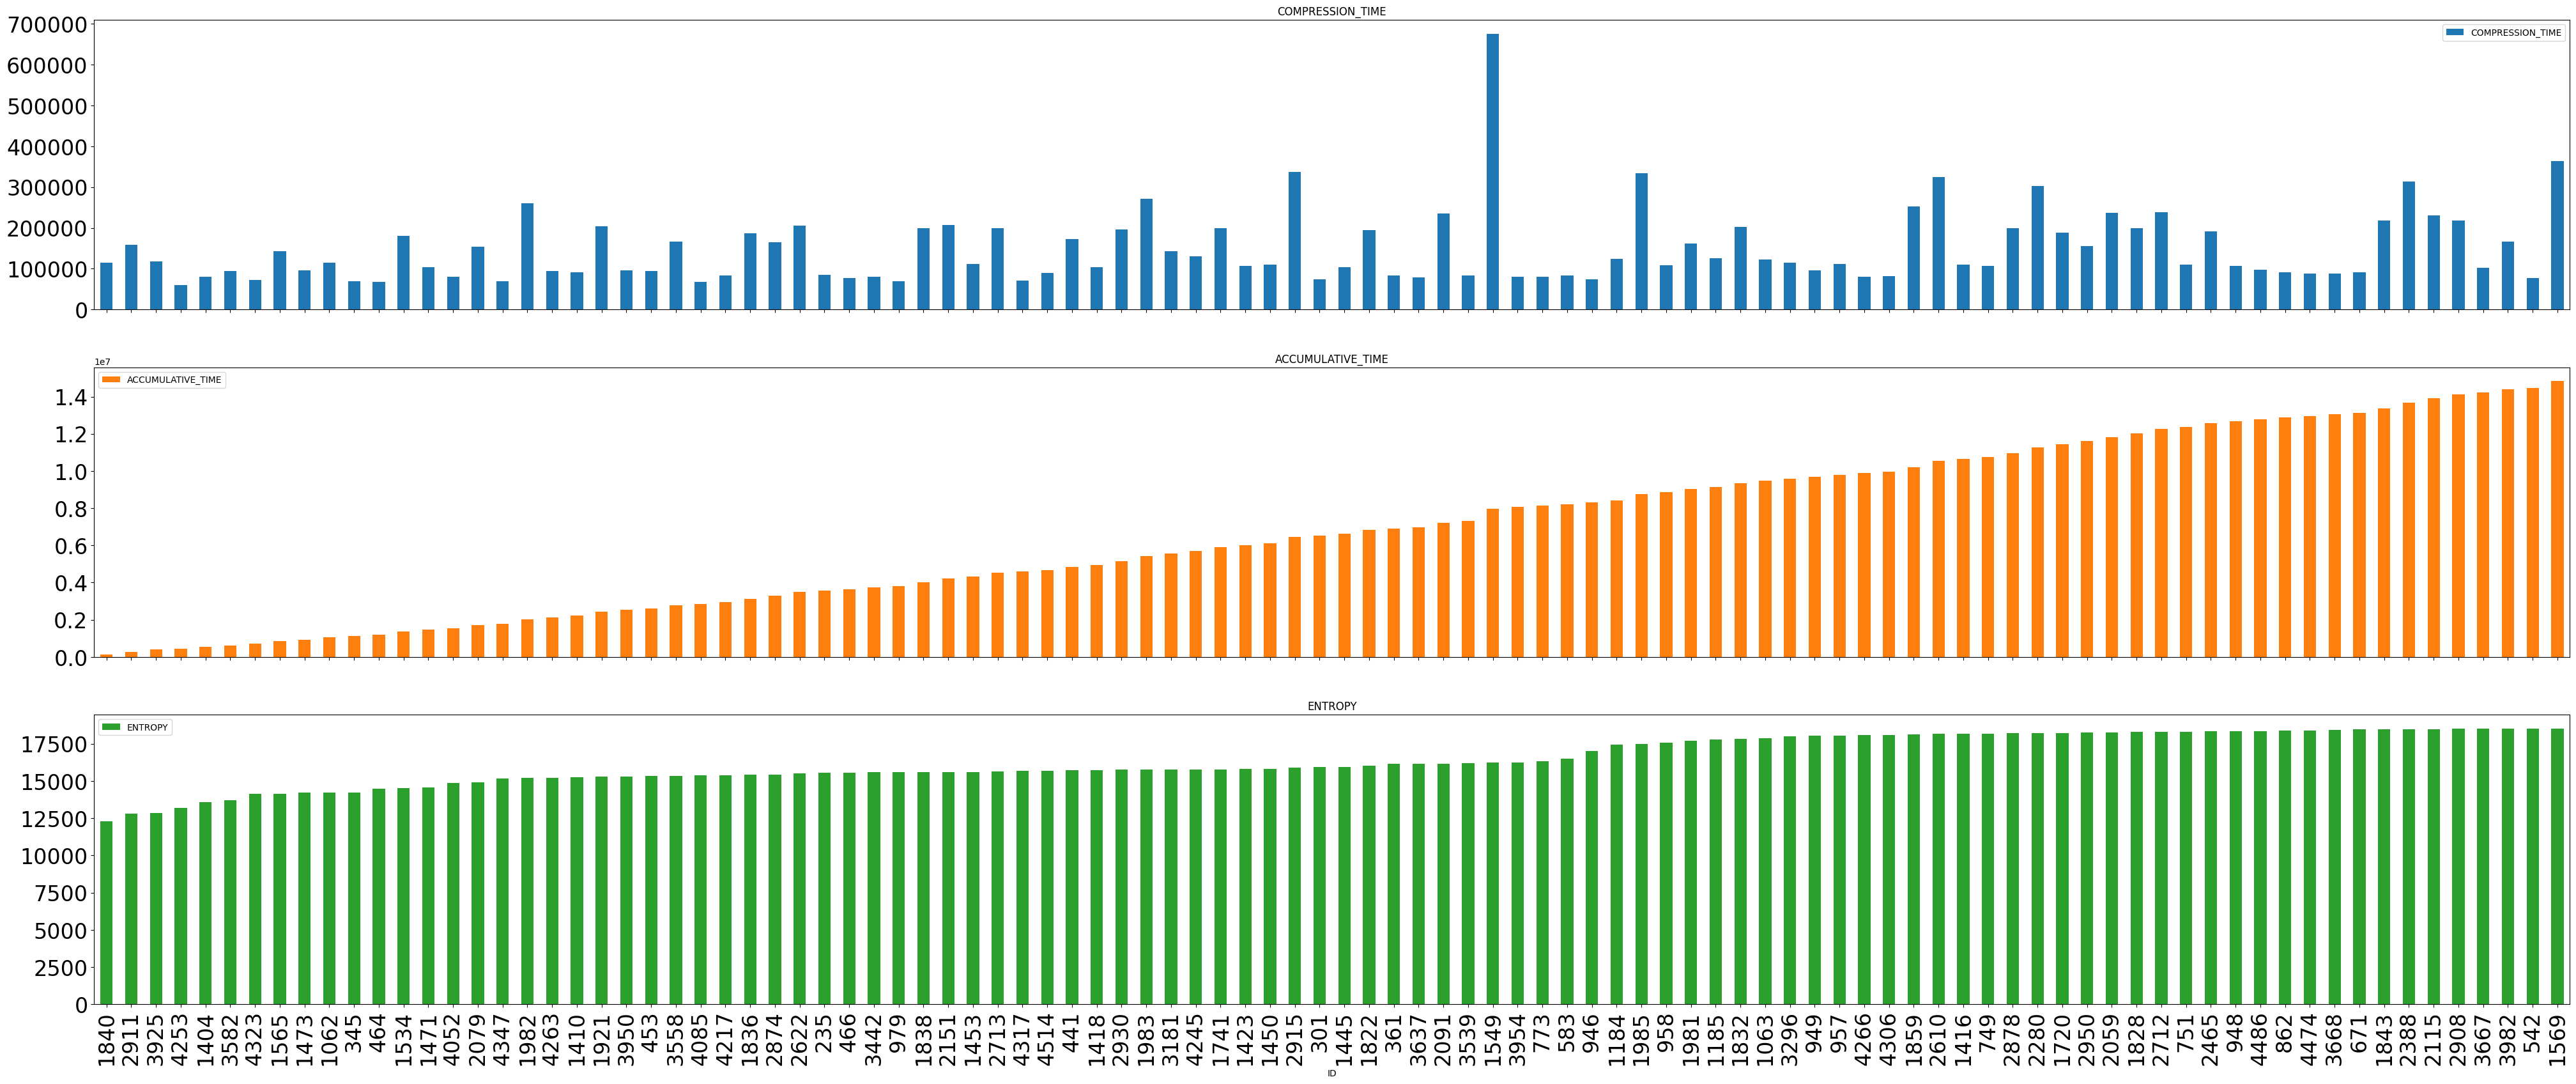

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/stat.csv')
df = df.drop_duplicates(subset=['ENTROPY'])

data = df.sort_values(by='ENTROPY')


# получение накопительного времени
compression_time = data['COMPRESSION_TIME']
accumulative_time = []

for i, value in enumerate(compression_time):
  if i == 0:
    accumulative_time.append(value)
    continue

  accumulative_time.append(accumulative_time[i - 1] + value)

data['ACCUMULATIVE_TIME'] = accumulative_time


# построение графиков
number = 100
data = data.head(number)
# data.plot.bar(x='ID', y='ENTROPY', color='g', fontsize=24, figsize=(50, 20))
# data.plot.bar(x='ID', y='COMPRESSION_TIME', color='b', fontsize=24, figsize=(50, 20))
data.plot.bar(x='ID', y=['COMPRESSION_TIME', 'ACCUMULATIVE_TIME', 'ENTROPY'], fontsize=24, figsize=(50, 20), subplots=True)

**ГИСТОГРАММЫ ПАМЯТИ**

array([<Axes: title={'center': 'ENTROPY'}, xlabel='ID'>,
       <Axes: title={'center': 'COMPRESSION_RATIO'}, xlabel='ID'>,
       <Axes: title={'center': 'COMPRESSION_FACTOR'}, xlabel='ID'>,
       <Axes: title={'center': 'SPACE_SAVINGS'}, xlabel='ID'>,
       <Axes: title={'center': 'COMPRESSION_GAIN'}, xlabel='ID'>],
      dtype=object)

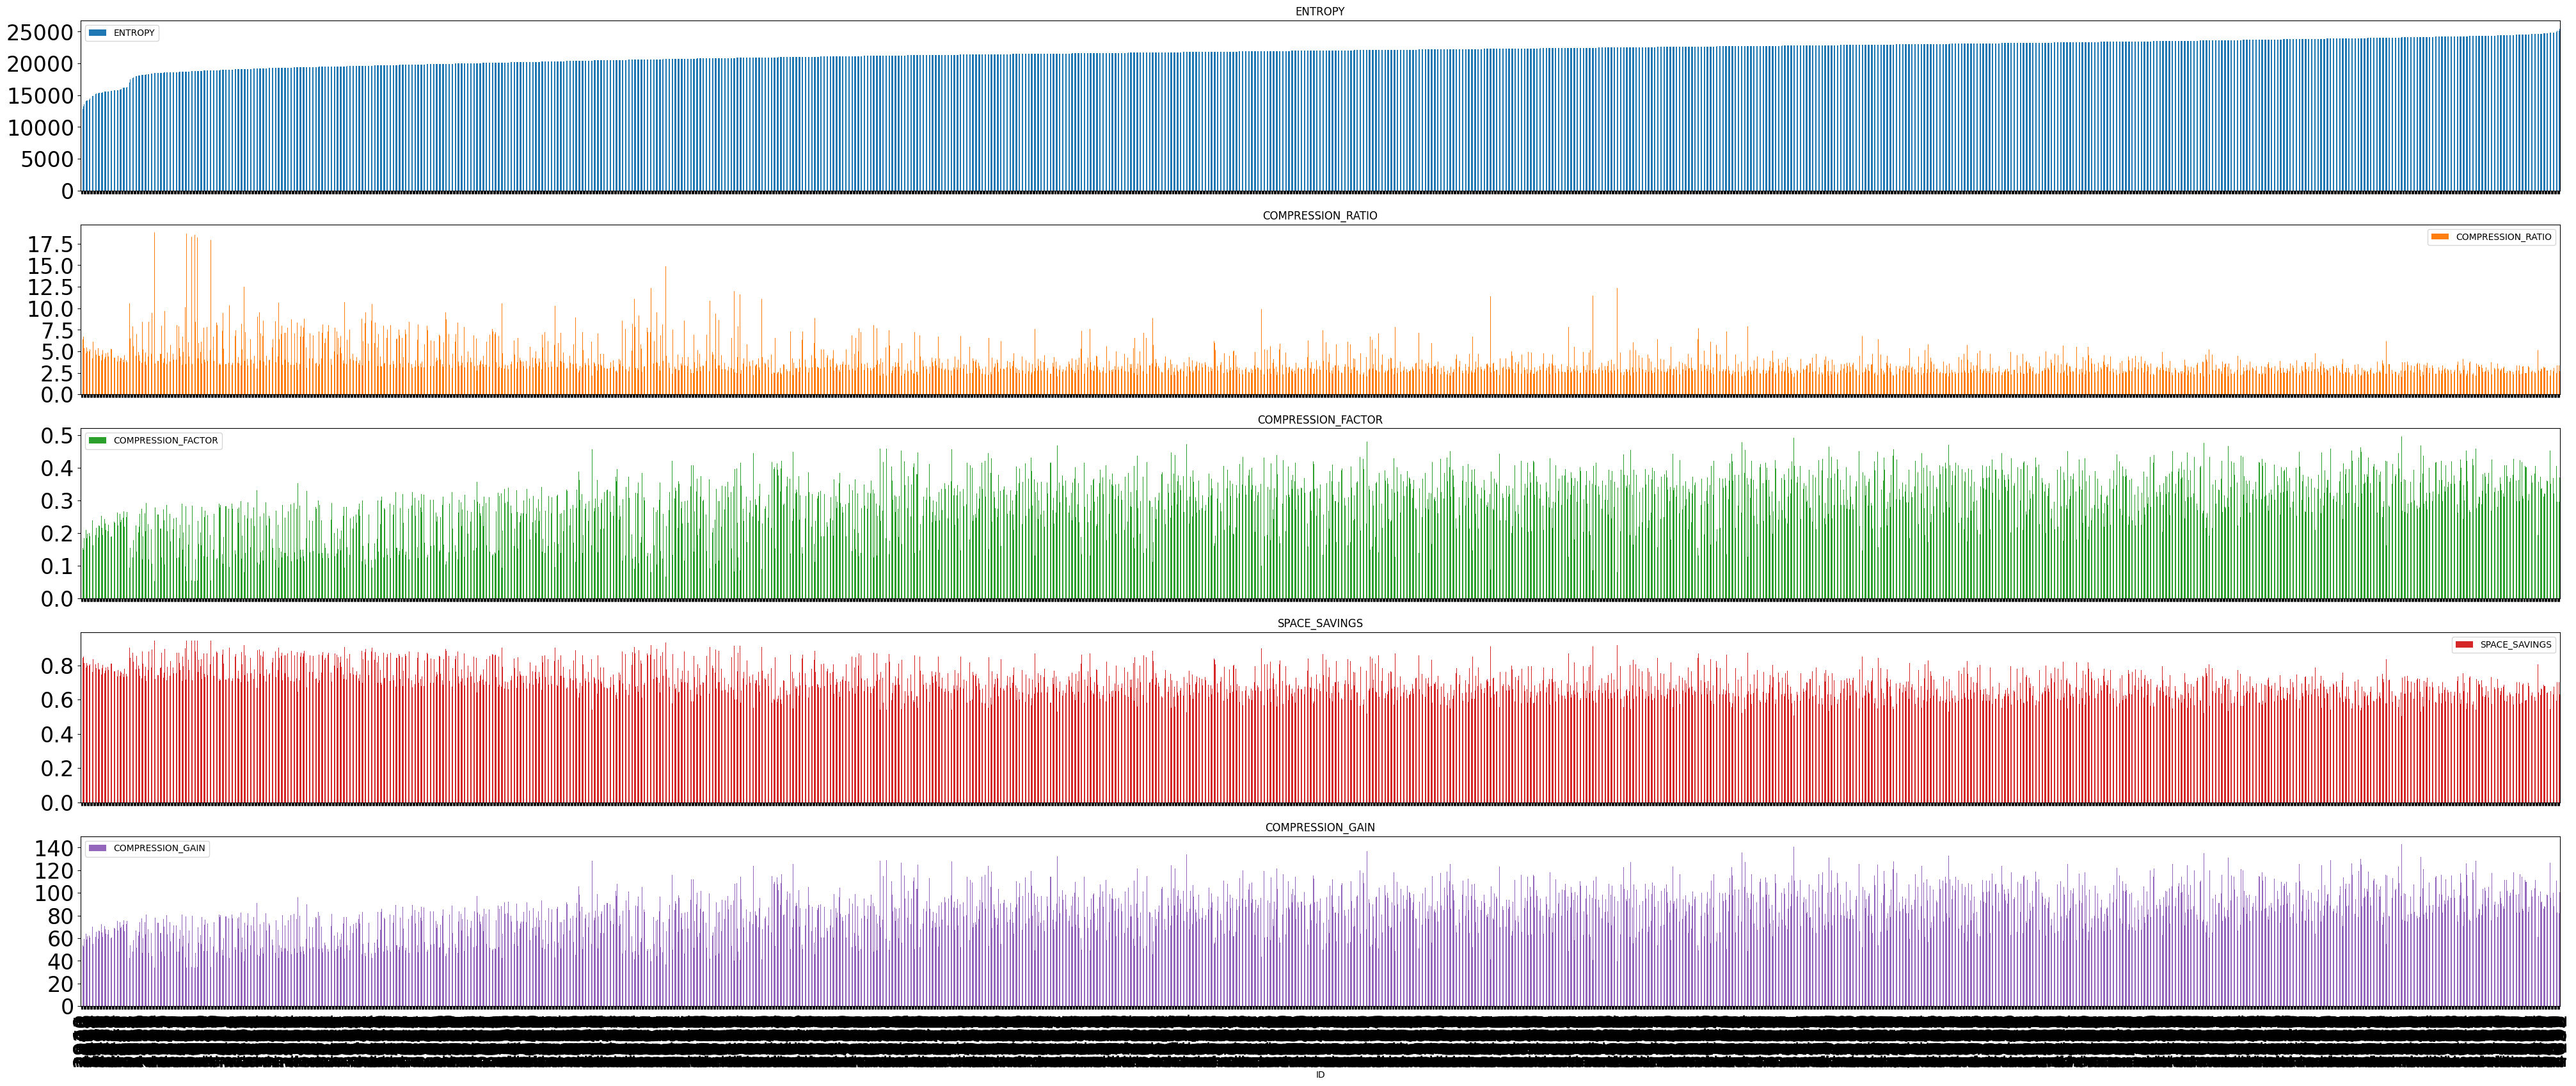

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/stat.csv')
df = df.drop_duplicates(subset=['ENTROPY'])

data = df.sort_values(by='ENTROPY')


# построение графиков
number = data.size
data = data.head(number)
data.plot.bar(x='ID', y=['ENTROPY', 'COMPRESSION_RATIO', 'COMPRESSION_FACTOR', 'SPACE_SAVINGS', 'COMPRESSION_GAIN'], fontsize=24, figsize=(50, 20), subplots=True)